<a href="https://colab.research.google.com/github/rridss/application_of_ml_-in-industries/blob/main/ASIGN1ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = '/content/mental_health_finaldata_1.csv'
df1 = pd.read_csv(file_path)
# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df1.head())

print("\nChecking for missing values:")
print(df1.isnull().sum())

# Get a summary of the dataset
print("\nSummary of the dataset:")
print(df1.describe())

# Label-based indexing: Select columns 'Column1', 'Column2', and 'Column3'
label_based_subset = df1[['Age', 'Occupation', 'Coping_Struggles']]

# Position-based indexing: Select columns at positions 0, 1, and 2
position_based_subset = df1.iloc[:, 0:3]


# Example: Filter rows where 'Column1' is lesser than 25
conditioned_df = df1[df1['Growing_Stress'] == 'Yes']

# Display the new DataFrames
print("\nLabel-based subset:")
print(label_based_subset.head())

print("\nPosition-based subset:")
print(position_based_subset.head())

print("\nDataFrame after filtering rows based on condition:")
print(conditioned_df.head())


First 5 rows of the dataset:
        Age  Gender Occupation        Days_Indoors Growing_Stress  \
0     20-25  Female  Corporate           1-14 days            Yes   
1  30-Above    Male     Others          31-60 days            Yes   
2  30-Above  Female    Student    Go out Every day             No   
3     25-30    Male     Others           1-14 days            Yes   
4     16-20  Female    Student  More than 2 months            Yes   

  Quarantine_Frustrations Changes_Habits Mental_Health_History Weight_Change  \
0                     Yes             No                   Yes           Yes   
1                     Yes          Maybe                    No            No   
2                      No            Yes                    No            No   
3                      No          Maybe                    No         Maybe   
4                     Yes            Yes                    No           Yes   

  Mood_Swings Coping_Struggles Work_Interest Social_Weakness  
0      Mediu

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# Identify missing values in the dataset
missing_values = df1.isnull().sum()
print("Missing Values:\n", missing_values)
# Impute missing values with mean for numerical columns and mode for categorical columns
df1['Age'].fillna(df1['Age'].mode()[0], inplace=True)
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)

# Extract the lower bound of the range from 'Days_Indoors'
df1['Days_Indoors_Numeric'] = df1['Days_Indoors'].str.extract(r'(\d+)-?').astype(float)

# Display the resulting DataFrame with the new column
print("DataFrame with the new 'Days_Indoors_Numeric' column:\n", df1[['Days_Indoors', 'Days_Indoors_Numeric']])

# Convert 'Gender' into numerical representation using one-hot encoding
df1['Gender'] = df1['Gender'].astype('category')
df1['Gender_Numeric'] = df1['Gender'].cat.codes

# Create an instance of OneHotEncoder
enc = OneHotEncoder()

# Passing encoded columns
enc_data = pd.DataFrame(enc.fit_transform(df1[['Gender_Numeric']]).toarray(), columns=['Gender_Female', 'Gender_Male'])

# Merge with the main DataFrame
new_df = pd.concat([df1, enc_data], axis=1)

# Display the resulting DataFrame without unnecessary printing
print(new_df[['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Days_Indoors_Numeric', 'Gender_Female', 'Gender_Male']])

# Assuming df is your DataFrame
# Replace 'Occupation', 'Days_Indoors_Numeric', and 'Growing_Stress' with the actual column names in your dataset
grouped_data = df1.groupby('Occupation')

# Apply aggregation functions (sum, mean, count) to the grouped data
aggregated_data = grouped_data.agg({
    'Days_Indoors_Numeric': 'mean',  # Change this to the actual numerical column
    'Growing_Stress': 'count'
})

# Rename the columns for better interpretation
aggregated_data.columns = ['Avg_Days_Indoors', 'Total_Growing_Stress']

# Display the aggregated data
print("Aggregated Data by Occupation:\n", aggregated_data)

Missing Values:
 Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64
DataFrame with the new 'Days_Indoors_Numeric' column:
            Days_Indoors  Days_Indoors_Numeric
0             1-14 days                   1.0
1            31-60 days                  31.0
2      Go out Every day                   NaN
3             1-14 days                   1.0
4    More than 2 months                   2.0
..                  ...                   ...
819    Go out Every day                   NaN
820           1-14 days                   1.0
821  More than 2 months                   2.0
822          15-30 days                  15.0
823          15-30 days         

In [ ]:
# Hypothetical dataset 1
data1 = {'ID': [1, 2, 3, 4],
         'Name': ['Alice', 'Bob', 'Charlie', 'David'],
         'Age': [25, 30, 22, 35]}
df2 = pd.DataFrame(data1)

# Hypothetical dataset 2
data2 = {'ID': [2, 3, 4, 5],
         'Occupation': ['Engineer', 'Student', 'Doctor', 'Teacher'],
         'Salary': [60000, 0, 80000, 50000]}
df3 = pd.DataFrame(data2)
# Inner Join
inner_join = pd.merge(df2, df3, on='ID', how='inner')
print("Inner Join:")
print(inner_join)

# Outer Join
outer_join = pd.merge(df2, df3, on='ID', how='outer')
print("\nOuter Join:")
print(outer_join)

# Left Join
left_join = pd.merge(df2, df3, on='ID', how='left')
print("\nLeft Join:")
print(left_join)

# Right Join
right_join = pd.merge(df2, df3, on='ID', how='right')
print("\nRight Join:")
print(right_join)

Inner Join:
   ID     Name  Age Occupation  Salary
0   2      Bob   30   Engineer   60000
1   3  Charlie   22    Student       0
2   4    David   35     Doctor   80000

Outer Join:
   ID     Name   Age Occupation   Salary
0   1    Alice  25.0        NaN      NaN
1   2      Bob  30.0   Engineer  60000.0
2   3  Charlie  22.0    Student      0.0
3   4    David  35.0     Doctor  80000.0
4   5      NaN   NaN    Teacher  50000.0

Left Join:
   ID     Name  Age Occupation   Salary
0   1    Alice   25        NaN      NaN
1   2      Bob   30   Engineer  60000.0
2   3  Charlie   22    Student      0.0
3   4    David   35     Doctor  80000.0

Right Join:
   ID     Name   Age Occupation  Salary
0   2      Bob  30.0   Engineer   60000
1   3  Charlie  22.0    Student       0
2   4    David  35.0     Doctor   80000
3   5      NaN   NaN    Teacher   50000


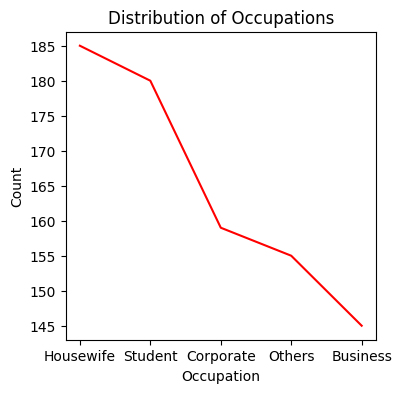

<Figure size 400x400 with 0 Axes>

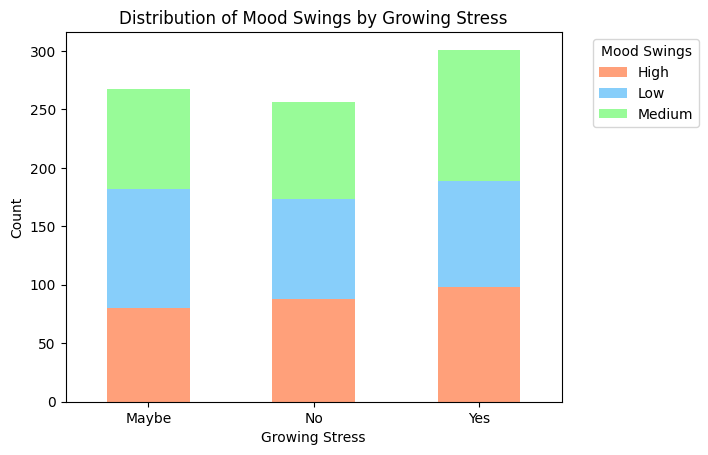

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/mental_health_finaldata_1.csv'
df = pd.read_csv(file_path)

#data visualization
plt.figure(figsize=(4,4))
df['Occupation'].value_counts().plot(kind='line',color=['red'])
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

mood_swings_by_stress = df.groupby('Growing_Stress')['Mood_Swings'].value_counts().unstack().fillna(0)

plt.figure(figsize=(4, 4))
mood_swings_by_stress.plot(kind='bar', stacked=True, color=['#FFA07A', '#87CEFA', '#98FB98'])
plt.title('Distribution of Mood Swings by Growing Stress')
plt.xlabel('Growing Stress')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Mood Swings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



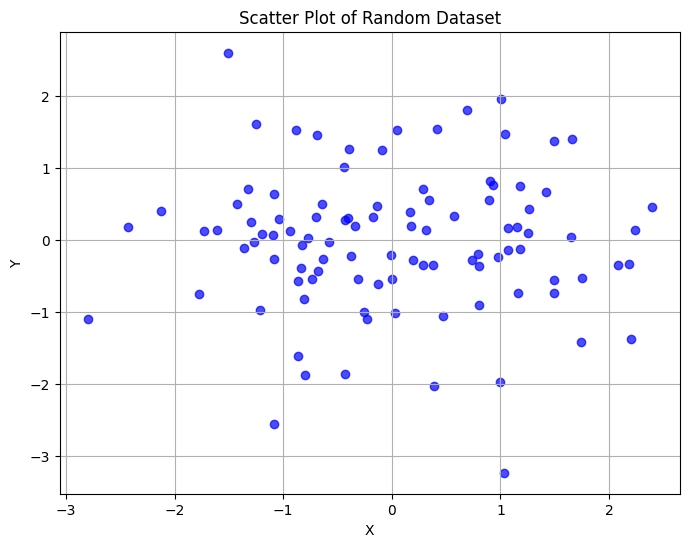

In [ ]:
# Generating a random dataset
np.random.seed(123)
data = pd.DataFrame({
    'X': np.random.normal(0, 1, 100),
    'Y': np.random.normal(0, 1, 100),
})

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Random Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

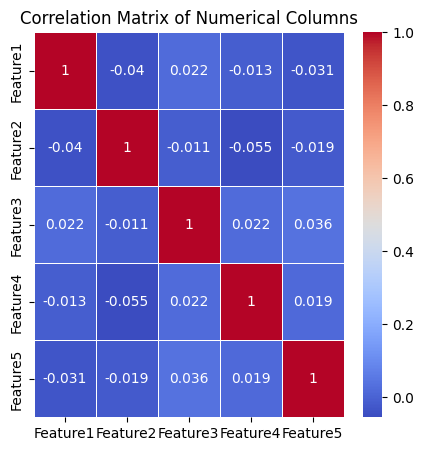

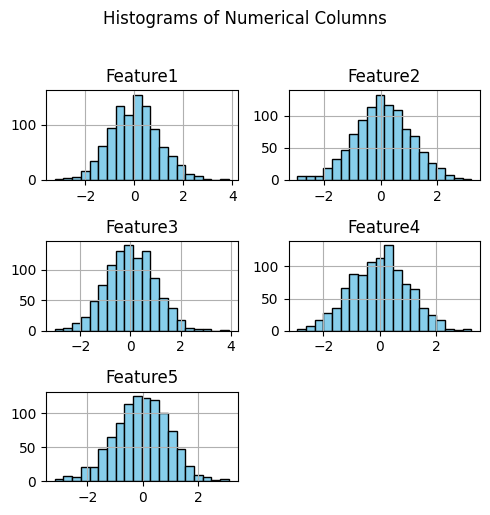

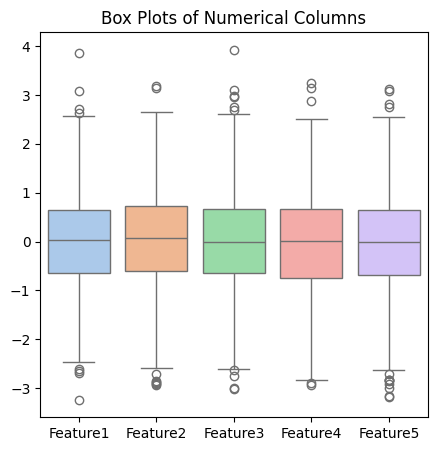

In [ ]:
# Generating a hypothetical dataset
np.random.seed(42)
data = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000),
    'Feature3': np.random.normal(0, 1, 1000),
    'Feature4': np.random.normal(0, 1, 1000),
    'Feature5': np.random.normal(0, 1, 1000),
})

# Visualize the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix with heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Create histograms for numerical columns
data.hist(figsize=(5, 5), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()

# Create box plots for numerical columns
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, palette='pastel')
plt.title('Box Plots of Numerical Columns')
plt.show()

In [ ]:
import numpy as np

# Step 1: Create a NumPy array 'arr' with values from 1 to 10
arr = np.arange(1, 11)

# Step 2: Create another NumPy array 'arr2' with values from 11 to 20
arr2 = np.arange(11, 21)

# Step 3: Perform basic operations
# Addition
add_result = arr + arr2
print("Addition Result:")
print(add_result)

# Subtraction
sub_result = arr - arr2
print("\nSubtraction Result:")
print(sub_result)

# Multiplication
mul_result = arr * arr2
print("\nMultiplication Result:")
print(mul_result)

# Division
div_result = arr / arr2
print("\nDivision Result:")
print(div_result)

Addition Result:
[12 14 16 18 20 22 24 26 28 30]

Subtraction Result:
[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]

Multiplication Result:
[ 11  24  39  56  75  96 119 144 171 200]

Division Result:
[0.09090909 0.16666667 0.23076923 0.28571429 0.33333333 0.375
 0.41176471 0.44444444 0.47368421 0.5       ]


In [ ]:
# Step 1: Reshape 'arr' into a 2x5 matrix
arr_reshaped = arr.reshape(2, 5)
print("Reshaped 'arr':\n", arr_reshaped)

# Step 2: Transpose the matrix obtained in the previous step
arr_transposed = arr_reshaped.T
print("\nTransposed matrix:\n", arr_transposed)

# Step 3: Flatten the transposed matrix into a 1D array
flattened_array = arr_transposed.flatten()
print("\nFlattened array:\n", flattened_array)

# Step 4: Stack 'arr' and 'arr2' vertically
stacked_array = np.vstack((arr, arr2))
print("\nVertically stacked array:\n", stacked_array)

Reshaped 'arr':
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]

Transposed matrix:
 [[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]

Flattened array:
 [ 1  6  2  7  3  8  4  9  5 10]

Vertically stacked array:
 [[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]]


In [ ]:
# Step 1: Calculate the mean, median, and standard deviation of 'arr'
mean_arr = np.mean(arr)
median_arr = np.median(arr)
std_dev_arr = np.std(arr)

print("Mean of 'arr':", mean_arr)
print("Median of 'arr':", median_arr)
print("Standard Deviation of 'arr':", std_dev_arr)

# Step 2: Find the maximum and minimum values in 'arr'
max_value = np.max(arr)
min_value = np.min(arr)

print("\nMaximum value in 'arr':", max_value)
print("Minimum value in 'arr':", min_value)

# Step 3: Normalize 'arr' (subtract the mean and divide by the standard deviation)
normalized_arr = (arr - mean_arr) / std_dev_arr
print("\nNormalized 'arr':", normalized_arr)

Mean of 'arr': 5.5
Median of 'arr': 5.5
Standard Deviation of 'arr': 2.8722813232690143

Maximum value in 'arr': 10
Minimum value in 'arr': 1

Normalized 'arr': [-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ]


In [ ]:
# Given array
arr = np.arange(1, 11)

# Step 1: Create a boolean array 'bool_arr' for elements in 'arr' greater than 5
bool_arr = arr > 5

# Step 2: Use 'bool_arr' to extract the elements from 'arr' that are greater than 5
result_arr = arr[bool_arr]

# Print the boolean array and the result
print("Boolean array 'bool_arr':", bool_arr)
print("\nElements in 'arr' greater than 5:", result_arr)

Boolean array 'bool_arr': [False False False False False  True  True  True  True  True]

Elements in 'arr' greater than 5: [ 6  7  8  9 10]


In [ ]:
# Step 1: Generate a 3x3 matrix with random values between 0 and 1
random_matrix = np.random.random((3, 3))
print("Random 3x3 matrix:\n", random_matrix)

# Step 2: Create an array of 10 random integers between 1 and 100
random_integers = np.random.randint(1, 101, 10)
print("\nArray of 10 random integers between 1 and 100:\n", random_integers)

# Given array
arr = np.arange(1, 10)

# Step 3: Shuffle the elements of 'arr' randomly
np.random.shuffle(arr)
print("\nShuffled array 'arr':", arr)

Random 3x3 matrix:
 [[0.16823658 0.18993474 0.46071217]
 [0.28627986 0.24746298 0.64523764]
 [0.65097175 0.82451707 0.41770857]]

Array of 10 random integers between 1 and 100:
 [80  7 22 93 75 56 97 58 93 64]

Shuffled array 'arr': [1 6 8 5 2 3 9 4 7]


In [ ]:
# Given array
arr = np.arange(1, 11)

# Step 1: Apply the square root function to all elements in 'arr'
sqrt_arr = np.sqrt(arr)
print("Square root of 'arr':", sqrt_arr)

# Step 2: Use the exponential function to calculate e^x for each element in 'arr'
exp_arr = np.exp(arr)
print("\nExponential function applied to 'arr':", exp_arr)

Square root of 'arr': [1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766]

Exponential function applied to 'arr': [2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04]


In [ ]:
# Task 11 - Step 1: Create a 3x3 matrix 'mat_a' with random values
mat_a = np.random.random((3, 3))
print("Matrix 'mat_a':\n", mat_a)

# Task 11 - Step 2: Create a 3x1 matrix 'vec_b' with random values
vec_b = np.random.random((3, 1))
print("\nVector 'vec_b':\n", vec_b)

# Task 11 - Step 3: Multiply 'mat_a' and 'vec_b' using the dot product
result = np.dot(mat_a, vec_b)
print("\nResult of mat_a * vec_b:\n", result)

Matrix 'mat_a':
 [[0.95502292 0.91963491 0.31119474]
 [0.20905813 0.84848221 0.90601907]
 [0.54159692 0.62942371 0.25691428]]

Vector 'vec_b':
 [[0.80080269]
 [0.63212243]
 [0.50351351]]

Result of mat_a * vec_b:
 [[1.50279753]
 [1.15995179]
 [0.96094493]]


In [ ]:
# Task 12 - Step 1: Create a 2D array 'matrix' with values from 1 to 9
matrix = np.arange(1, 10).reshape(3, 3)
print("Original matrix:\n", matrix)

# Task 12 - Step 2: Subtract the mean of each row from each element in that row
mean_per_row = matrix.mean(axis=1, keepdims=True)
result_broadcasting = matrix - mean_per_row
print("\nResult after broadcasting subtraction of row means:\n", result_broadcasting)

Original matrix:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Result after broadcasting subtraction of row means:
 [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
